# Fractals

## Complex Newton's Method

In [39]:
def newton(f, f_prime, x0, eps=0.001):
    x = x0
    for _ in range(1000):
        y = f(x)
        z = f_prime(x)
        if z == 0 or abs(y) < eps:
            break
        x -= y/f_prime(x)
    return x, abs(y)

def f(x):
    return x**2 + 1

def f_prime(x):
    return 2*x

newton(f, f_prime, 0.1 + 1j)


((-2.468997680998516e-06+1.0000121902893022j), 2.4875770432471233e-05)

## Roots of $x^2 - 1$

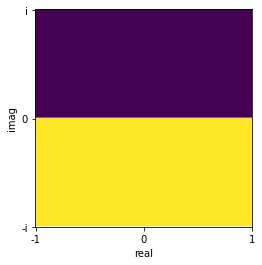

In [94]:
import numpy as np
import matplotlib.pyplot as plt

l = 100

def make_plot(f, f_prime):
    vals = []
    nums = np.linspace(-1, 1, l)

    # evaluate newton on grid
    for i, a in enumerate(nums):
        row = []
        for j, b in enumerate(nums):
            x0 = a + 1j*b
            row.append([newton(f, f_prime, x0)[0]])
        vals.append(row)

    vals = np.transpose(np.array(vals).reshape(l, l))

    # plotting
    plt.imshow(vals.imag)
    plt.xlabel("real")
    plt.ylabel("imag")

    plt.xticks([0, l//2, l], [-1, 0, 1])
    plt.yticks([0, l//2, l], ["i", 0, "-i"])

make_plot(f, f_prime)

This plot shows which root Newton's method converges to for different seed values on the polynomial expression $x^2 + 1$. This expression has two roots, $i$ (purple) and $-i$ (yellow). We can see that the method converges to whichever is closer. When the imaginary component is negative, the derivative in the imaginary direction is negative, and the value is pushed to $-i$. Similarily, positive seeds are pushed to positive $i$.

When the imaginary part of the seed is zero (at the boundary of the two colors), the imaginary component of the derivative is also zero. So, the method will not converge to either root.

## Roots of $x^3 - 1$

The polynomial expression $x^3 - 1$ has three roots: $1$, $-i^{2/3}$, and $i^{4/3}$.

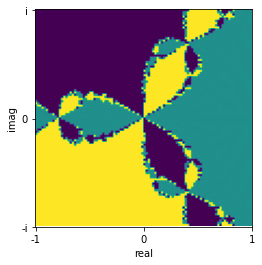

In [95]:
make_plot(lambda x:x**3 - 1, lambda x:3*x**2)

This plot shows the root that Newton's method converges to for different seed values. In this plot, purple represents the $-i^{2/3}$. Blue represents $1$. Yellow represents $i^{4/3}$. We can see that, in a majority of cases, the seed will converge to the closest route. However, that is not always the case, and there are complicated patterns towards the center.

## Roots of $x^5 - 1$

In [102]:
import sympy as sp
x = sp.Symbol("x", complex=True)

[sp.N(i) for i in sp.solve(x**5 - 1)]

[1.00000000000000,
 0.309016994374947 - 0.951056516295154*I,
 0.309016994374947 + 0.951056516295154*I,
 -0.809016994374947 - 0.587785252292473*I,
 -0.809016994374947 + 0.587785252292473*I]

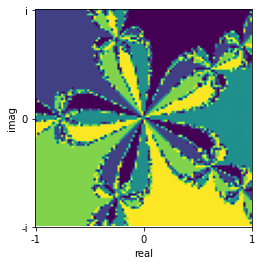

In [96]:
make_plot(lambda x:x**5 - 1, lambda x:5*x**4)

# Strange Attractors

# PDE Solver

# Another Transform

$$
\mathcal{L}\{f\}(s) = \int_0^\infty {f(t) \over e^{st}} dt
$$

## Linearity

$$
\mathcal{L}\{f + g\}(s) = \int_0^\infty {f(t) + g(t) \over e^{st}} dt
$$

Distribute the integral,

$$
\int_0^\infty {f(t) \over e^{st}} dt + \int_0^\infty {g(t) \over e^{st}} dt
$$

Which we recognize,

$$
\mathcal{L}\{f\}(s) + \mathcal{L}\{g\}(s)
$$

## Existence

The transform will only exist if that infinite integral exists. Sometimes, it doesn't. For example, let $f(x) = e^x$.

$$
\mathcal{L}\{f\}(s) = \int_0^\infty {f(t) \over e^{st}} dt
$$

$$
\mathcal{L}\{f\}(s) = \int_0^\infty {e^t \over e^{st}} dt
$$

$$
\mathcal{L}\{f\}(s) = \int_0^\infty e^{s} dt
$$

From the standpoint of the integral, $s$ is a constant. So, this integral will diverge.

## Step Function

Let $u(x)$ represent the step function, such that,

$$
u(x) =
\left\{
\begin{array}{ll}
      0 & x \lt 0 \\
      1 & x \ge 0
\end{array} 
\right.
$$

We can get an expression for the Laplace transform.

$$
\mathcal{L}\{u\}(s) = \int_0^\infty {u(t) \over e^{st}} dt
$$

Since $u(t)$ is always 1 on the domain of the integral, we can replace it with a one.

$$
\mathcal{L}\{u\}(s) = \int_0^\infty e^{-st} dt
$$

$$
= {1 \over -s} \int_0^\infty -s e^{-st} dt
$$

$$
= {1 \over -s} \Big[ e^{-st} \Big]_0^\infty + C
$$

$$
= {1 \over -s} \lim_{t \to \infty} (e^{-st} - 1) + C
$$

When $s$ is negative, the sign of the exponent will be positive, and the whole thing will go to infinity. When $s$ is zero, the exponent will be zero and so the $\exp$ expression will be 1. So, the whole expression will be $0$. When $s$ is positive, the sign if the exponent will be negative and the $\exp$ goes away. We just end up with a $-1$ from the limit and a $1/s$ from the entire expression.

$$
\mathcal{L}\{u\}(s) = 
\left\{
\begin{array}{ll}
      \infty & x \lt 0 \\
      C & s = 0\\
      C/s & s \gt 0
\end{array} 
\right.
$$

## Laplace of Derivative

Let, $$\mathcal{L}\{y\}(s) = Y$$

Now, we compute the Laplace transform of $y'$.

$$
\mathcal{L}\{y'\}(s) = \int_0^\infty {y'(t) \over e^{st}} dt
$$

Integrate by parts

$$
\begin{array}{ll}
    v = y & dv = y'\\
    u = e^{-st} & du = -se^{-st}
\end{array}
$$

$$
\mathcal{L}\{y'\}(s) = ye^{-st} - \int_0^\infty -se^{-st}y dt
$$

$$
\mathcal{L}\{y'\}(s) = ye^{-st} + s \int_0^\infty e^{-st}y dt
$$

$$
\mathcal{L}\{y'\}(s) = ye^{-st} + s Y
$$